Part 4: Variable Distribution

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)

In [5]:
airbnbs = pd.read_pickle("data/airbnb.3.grouped.pkl")
airbnbs.dtypes

room_id                    int64
host_id                    int64
room_type                 object
neighborhood              object
reviews                    int64
overall_satisfaction     float64
accommodates               int64
bedrooms                 float64
price                    float64
review_type             category
price_type              category
accommodate_type        category
dtype: object

In [6]:
airbnbs.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,review_type,price_type,accommodate_type
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0,medium,cheap,very few
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0,very few,cheap,very few
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0,very many,medium,few
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0,very many,cheap,medium
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0,very many,medium,medium


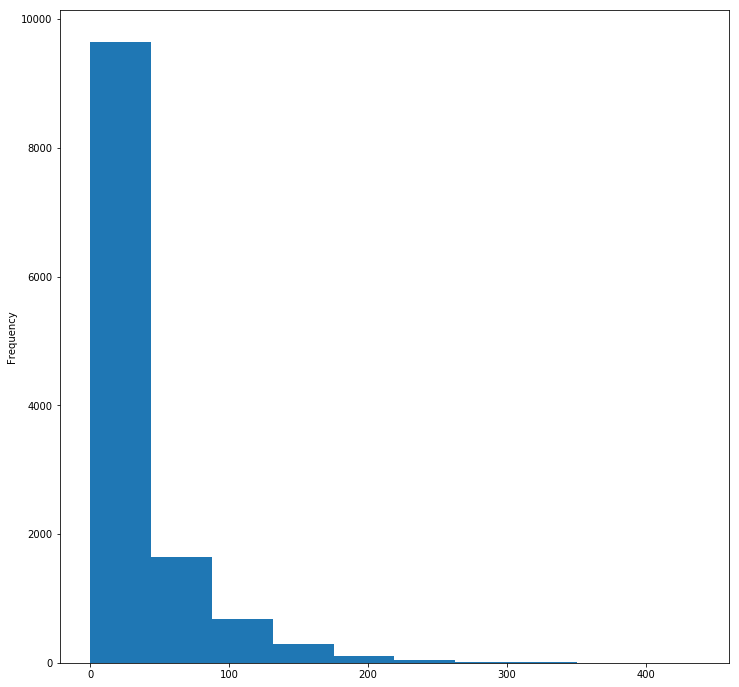

In [7]:
airbnbs['reviews'].plot.hist();

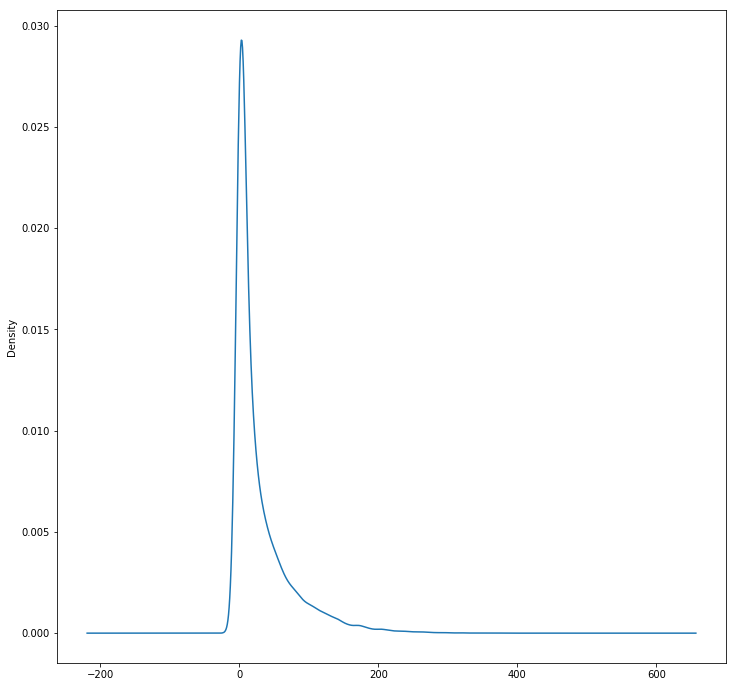

In [8]:
airbnbs['reviews'].plot.kde();

In [21]:
def numerical_variable_distribution(df, col):
    df[col].plot.kde()
    plt.xlabel('Variable "{}" Distribution'.format(col))
    plt.show()
    
numerical_columns = airbnbs.select_dtypes(np.number).columns.tolist()

from ipywidgets import interact, fixed

interact(numerical_variable_distribution, col=numerical_columns, df=fixed(airbnbs));
# we see that accommodates and bedrooms are unbalanced

interactive(children=(Dropdown(description='col', options=('room_id', 'host_id', 'reviews', 'overall_satisfact…

In [10]:
airbnbs['accommodates'].value_counts(normalize=True)

4     0.289888
2     0.283628
6     0.125040
3     0.090530
5     0.070546
1     0.049278
8     0.031059
7     0.020626
10    0.014045
9     0.006822
16    0.006421
12    0.005136
11    0.002970
14    0.001766
15    0.001445
13    0.000803
Name: accommodates, dtype: float64

In [11]:
airbnbs['bedrooms'].value_counts(normalize=True)

1.0     0.591974
2.0     0.259631
3.0     0.099920
4.0     0.027769
5.0     0.010594
6.0     0.005698
7.0     0.002006
10.0    0.001124
9.0     0.000722
8.0     0.000562
Name: bedrooms, dtype: float64

In [12]:
from scipy import stats

def numerical_variable_normality(col):
    stats.probplot(airbnbs[col], plot=plt)
    plt.xlabel('Probability plot for variable {}'.format(col))
    plt.show()
    
interact(numerical_variable_normality, col=numerical_columns);

interactive(children=(Dropdown(description='col', options=('room_id', 'host_id', 'reviews', 'overall_satisfact…

In [13]:
for num_col in numerical_columns:
    _, pval = stats.normaltest(airbnbs[num_col][airbnbs[num_col].notnull()])
    if(pval < 0.05):
        print("Column {} doesn't follow a normal distribution".format(num_col))
        
# we see that none of the variables follow a normal distribution

Column room_id doesn't follow a normal distribution
Column host_id doesn't follow a normal distribution
Column reviews doesn't follow a normal distribution
Column overall_satisfaction doesn't follow a normal distribution
Column accommodates doesn't follow a normal distribution
Column bedrooms doesn't follow a normal distribution
Column price doesn't follow a normal distribution


In [14]:
def categorical_variable_distribution(col):
    airbnbs[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()
    
categorical_columns = airbnbs.select_dtypes(
    ['object', 'category']).columns.tolist()

interact(categorical_variable_distribution, col=categorical_columns);

interactive(children=(Dropdown(description='col', options=('room_type', 'neighborhood', 'review_type', 'price_…

In [15]:
# CONCLUSIONS:

# no numerical value follows a normal distribution
# the variables bedrooms and accommodates have unbalanced discrete distributions
# the top neighborhood is Santa Maria Maior
# the overall satisfaction scores concentrate around the higher and lower end
# most listings offered can house very few accommodates 

Part 5: Comparisons

In [16]:
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

price_by_accommodates = pivot_count(airbnbs, "price_type","accommodates", "room_id")
price_by_accommodates

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
price_type,,,,,,,,,,,,,,,,
very cheap,533.0,1690.0,229.0,242.0,23.0,46.0,8.0,11.0,9.0,9.0,2.0,1.0,1.0,1.0,NaN,5.0
cheap,53.0,971.0,372.0,915.0,147.0,149.0,21.0,12.0,1.0,8.0,NaN,1.0,NaN,NaN,NaN,1.0
medium,11.0,397.0,269.0,982.0,202.0,271.0,18.0,34.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
expensive,7.0,279.0,185.0,949.0,293.0,510.0,67.0,102.0,14.0,19.0,3.0,4.0,1.0,1.0,NaN,2.0
very expensive,10.0,197.0,73.0,524.0,214.0,582.0,143.0,228.0,56.0,137.0,32.0,58.0,8.0,20.0,18.0,72.0


In [17]:
def heatmap_count_types(df, col1, col2):
    pivot_table = pivot_count(df,col1, col2, "room_id")
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()
    
interact(heatmap_count_types, col1=airbnbs.columns.drop(["room_id"]),
                                 col2=airbnbs.columns.drop(["room_id"]),
                                 df=fixed(airbnbs));

# the less accommodates, the cheaper the listing

interactive(children=(Dropdown(description='col1', options=('host_id', 'room_type', 'neighborhood', 'reviews',…

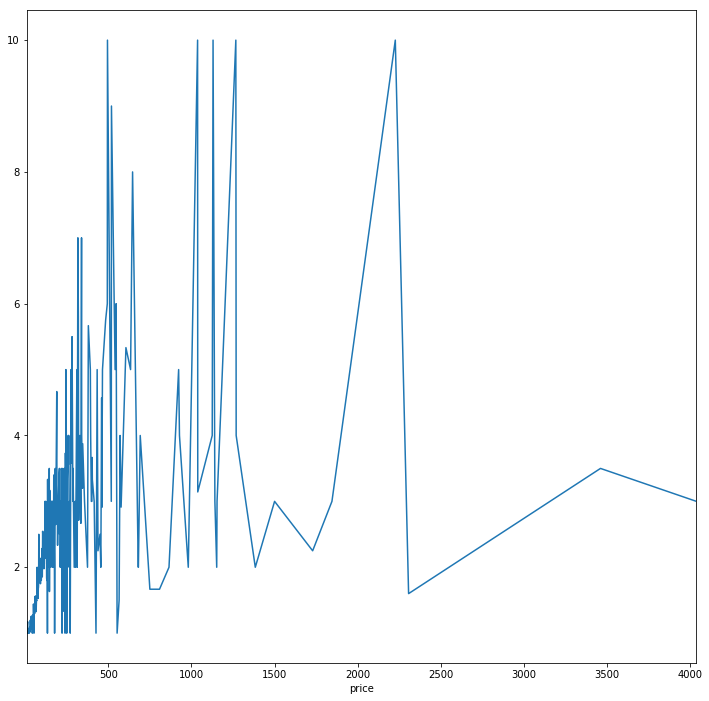

In [24]:
airbnbs_by_price = airbnbs.query("price < 5000")
airbnbs_by_price.groupby('price')['bedrooms'].mean().plot();

In [25]:
def mean_trend(col_calc):
    airbnbs_by_price.groupby('price')[col_calc].mean().plot()
    plt.ylabel(col_calc)
    plt.title("{} by price".format(col_calc))
    plt.show()
    
interact(mean_trend, col_calc=numerical_columns);

interactive(children=(Dropdown(description='col_calc', options=('room_id', 'host_id', 'reviews', 'overall_sati…

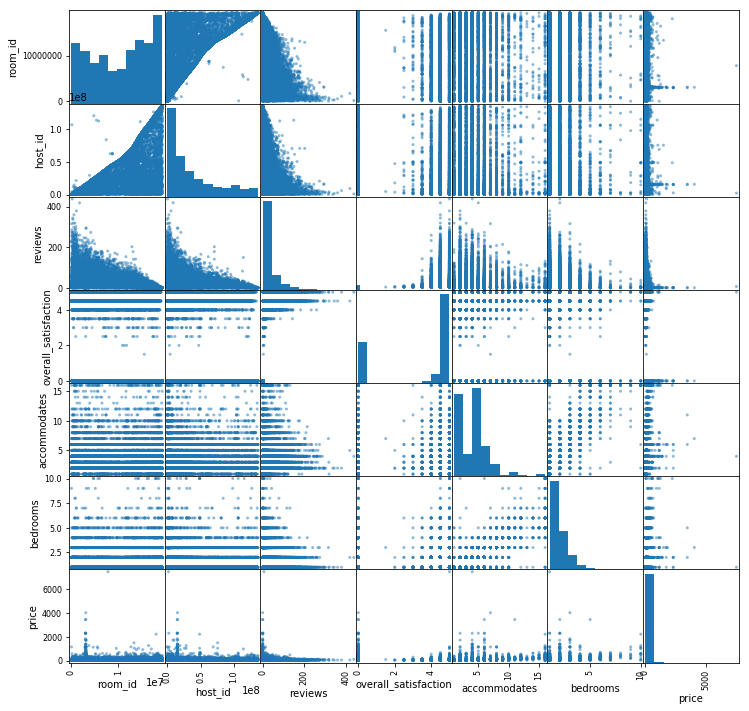

In [27]:
pd.plotting.scatter_matrix(airbnbs.select_dtypes([int, float]));

In [29]:
airbnbs.corr()

# very low correlations except a positive relationship between bedrooms and accommodates

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
room_id,1.000000,0.597831,-0.493204,-0.307809,-0.054168,-0.020956,-0.068218
host_id,0.597831,1.000000,-0.284277,-0.180069,-0.073261,-0.052033,-0.049144
reviews,-0.493204,-0.284277,1.000000,0.431676,0.012313,-0.036257,-0.082643
overall_satisfaction,-0.307809,-0.180069,0.431676,1.000000,0.082939,0.026632,-0.123841
accommodates,-0.054168,-0.073261,0.012313,0.082939,1.000000,0.806026,0.302358
bedrooms,-0.020956,-0.052033,-0.036257,0.026632,0.806026,1.000000,0.315811
price,-0.068218,-0.049144,-0.082643,-0.123841,0.302358,0.315811,1.000000


Part 6: Data Processing

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,12)

airbnbs = pd.read_csv("data/airbnb.csv")
airbnbs.shape

(13232, 9)

In [40]:
airbnbs = airbnbs.drop_duplicates()
airbnbs.shape
airbnbs.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.323200e+04,1.323200e+04,13232.000000,13222.000000,13232.000000,13232.000000,13232.000000
mean,1.055081e+07,3.616444e+07,29.130063,3.284677,3.917775,1.549501,86.592352
std,6.069884e+06,3.706975e+07,42.802762,2.123236,2.293757,1.062821,135.208926
min,6.499000e+03,1.445500e+04,0.000000,0.000000,1.000000,0.000000,10.000000
25%,5.054848e+06,6.197930e+06,2.000000,0.000000,2.000000,1.000000,45.000000
50%,1.166226e+07,2.207571e+07,11.000000,4.500000,4.000000,1.000000,64.000000
75%,1.609631e+07,5.546697e+07,39.000000,5.000000,5.000000,2.000000,93.000000
max,1.940072e+07,1.359156e+08,438.000000,5.000000,16.000000,10.000000,7496.000000


In [41]:
# remove outliers

from scipy import stats
import numpy as np

def outliers_col(df):
    for column in df:
        if df[column].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[column])) > 3])    
            print("{} | {} | {}".format(
                df[column].name,
                n_outliers,
                df[column].dtype
        ))

outliers_col(airbnbs)

room_id | 0 | int64
host_id | 0 | int64
reviews | 296 | int64
overall_satisfaction | 0 | float64
accommodates | 231 | int64
bedrooms | 258 | float64
price | 121 | float64


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [48]:
price_min = airbnbs.price.mean() - 3 * airbnbs.price.std()
price_max = airbnbs.price.mean() + 3 * airbnbs.price.std()
print(price_min, price_max)

bedrooms_min = airbnbs.bedrooms.mean() - 3 * airbnbs.bedrooms.std()
bedrooms_max = airbnbs.bedrooms.mean() + 3 * airbnbs.bedrooms.std()
print(bedrooms_min, bedrooms_max)

airbnbs = airbnbs[
    (np.abs(stats.zscore(airbnbs.price)) < 3)  & \
    (np.abs(stats.zscore(airbnbs.bedrooms)) < 3) & \
    (np.abs(stats.zscore(airbnbs.accommodates)) < 3) & \
    (np.abs(stats.zscore(airbnbs.reviews)) < 3)
]

outliers_col(airbnbs)
airbnbs.shape

-26.68670851064863 158.28034068492596
-0.8056374085895222 3.5107903201940465
room_id | 0 | int64
host_id | 0 | int64
reviews | 258 | int64
overall_satisfaction | 0 | float64
accommodates | 0 | int64
bedrooms | 0 | float64
price | 28 | float64


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


(11607, 9)

In [49]:
# missing values

n_records = len(vehicles)
def missing_values_col(df):
    for column in df:
        print("{} | {} | {}".format(
            column, len(df[df[column].isnull()]) / (1.0*n_records), df[column].dtype
        ))

missing_values_col(airbnbs)

room_id | 0.0 | int64
host_id | 0.0 | int64
room_type | 0.0 | object
neighborhood | 0.0 | object
reviews | 0.0 | int64
overall_satisfaction | 0.0006801692865779928 | float64
accommodates | 0.0 | int64
bedrooms | 0.0 | float64
price | 0.0 | float64
